In [486]:
import pandas as pd
import matplotlib.pyplot
import numpy as np
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from IPython.display import display, HTML

## Initial Loading of Data and spitting by Gender and cleain the column names

In [487]:
# Retrives resuable funcitons and 
%run mlLibrary.ipynb
%run BasicDataExploration.ipynb

# Load the dataset
df_revision_1 = pd.read_csv('DataSampled.csv')
df_revision_1.head(2)

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking (packet/year),Alcohol,DM,DM duration,İnsülin,DM drug,Hiperlipidemi,Dyslipidemia duration,Dyslipidemia drugs,KAH,KAH duration,Hipotiroidi,ASTIM,KOAH,OP,Other(s),HT,Anti-HT drug type,HT duration,Education,Occupation,Working Status,Exercise,LowCST,CST,Gait speed,Low grip strength,Grip strength,SARCOPENIA,STAR,BMI,Gender
0,NaN,64,66.0,155.0,89.0,104.0,0.0,0,0,0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,NaN,0.0,High School,Officer,Retire,0,0.0,8.1,1.28,0.0,28.0,0.0,1.00,27.4,F
1,NaN,53,55.0,150.0,77.0,97.0,0.0,0,0,0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,aritmi,0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,8.0,1.47,1.0,16.0,0.0,1.84,24.4,F


In [488]:
# Create the dataframes to show the data
model_1_logistic_male = getResultsDataFrame("h_model_1_logistic_male")
model_1_forest_male = getResultsDataFrame("h_model_1_forest_male")
model_1_gradient_male = getResultsDataFrame("h_model_1_gradient_male")

model_1_logistic_female = getResultsDataFrame("h_model_1_logistic_female")
model_1_forest_female = getResultsDataFrame("h_model_1_forest_female")
model_1_gradient_female = getResultsDataFrame("h_model_1_gradient_female")


In [489]:
# Do the initial cleanup of the column headers
df_revision_1 = initialCleanup(df_revision_1)
df_revision_1.head(2)

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking (packet/year),Alcohol,DM,DM duration,İnsülin,DM drug,Hiperlipidemi,Dyslipidemia duration,Dyslipidemia drugs,KAH,KAH duration,Hipotiroidi,ASTIM,KOAH,OP,Other(s),HT,Anti-HT drug type,HT duration,Education,Occupation,Working Status,Exercise,LowCST,CST,Gait speed,Low grip strength,Grip strength,SARCOPENIA,STAR,BMI,Gender
0,NaN,64,66.0,155.0,89.0,104.0,0.0,0,0,0,0.0,0.0,<NA>,0.0,0.0,<NA>,0.0,0.0,0.0,0.0,0.0,NaN,<NA>,0,<NA>,0.0,High School,Officer,Retire,0,0.0,8.1,1.28,0.0,28.0,0.0,1.00,27.4,F
1,NaN,53,55.0,150.0,77.0,97.0,0.0,0,0,0,0.0,0.0,<NA>,0.0,0.0,<NA>,0.0,0.0,0.0,0.0,0.0,NaN,aritmi,0,<NA>,0.0,<NA>,<NA>,<NA>,<NA>,0.0,8.0,1.47,1.0,16.0,0.0,1.84,24.4,F


In [490]:
# Create the dataframe with the exact list of columns needed for the model
column_list = ['Age', 'Weight', 'Height', 'Exercise', 'HT', 'DM', 'Education', 'Smoking', 'Gender', 'SARCOPENIA']
(df_female, df_male) = createDataframesForModel(df_revision_1, column_list)
print("Shape of female", df_female.shape, "Shape of male", df_male.shape)

Shape of female (924, 10) Shape of male (379, 10)


## Preprocessing 

In [491]:
### Initial state of the Male / Female Datasets.

In [492]:
pd.set_option('display.max_rows',None)
column_info = info_about_columns(dataframe=df_male, data_science_descriptions=None)
column_info

,DataType,# of Categories,categories/sample ratio,missing values,missing values %
Age,int64,44,12.0,0,0.000000
Weight,float64,71,19.0,1,0.263852
Height,float64,41,11.0,2,0.527704
Exercise,string[python],3,1.0,4,1.055409
HT,int64,2,1.0,0,0.000000
DM,int64,2,1.0,0,0.000000
Education,string[python],20,5.0,4,1.055409
Smoking,float64,2,1.0,0,0.000000
Gender,string[python],1,0.0,0,0.000000
SARCOPENIA,float64,2,1.0,1,0.263852


## Preprocessing for the female dataset

In [493]:
pd.set_option('display.max_colwidth', None)
show_examples_of_data(dataframe=df_female, data_information=column_info, category_cutoff=5)

,Field,Value,Number of Values
0,Age,45 to 90,NA
1,Weight,42.0 to 140.0,NA
2,Height,1.59 to 179.0,NA
3,Exercise,"[0, <NA>, 1-2/week, 3-4/week]",4
4,HT,"[0, 1]",2
5,DM,"[0, 1]",2
6,Education,"[High School, <NA>, Illiterate, illiterate, ilkokul, Secondary School, high school, primary school, Primary school, university, University, high School, Primary School, primary School, High school, Secondary school, secondary school, secondary School, highschool, housewife, illeterate, İlliterate, üniversite, lise, okur-yzar değil, ortaokul, none, worker ]",28
7,Smoking,"[0.0, 1.0, nan]",3
8,Gender,[f],1
9,SARCOPENIA,"[0.0, 1.0]",2


In [494]:
pd.set_option('display.max_rows',None)
column_info = info_about_columns(dataframe=df_female, data_science_descriptions=None)
column_info

,DataType,# of Categories,categories/sample ratio,missing values,missing values %
Age,int64,42,5.0,0,0.000000
Weight,float64,94,10.0,0,0.000000
Height,float64,43,5.0,0,0.000000
Exercise,string[python],3,0.0,16,1.731602
HT,int64,2,0.0,0,0.000000
DM,int64,2,0.0,0,0.000000
Education,string[python],27,3.0,16,1.731602
Smoking,float64,2,0.0,1,0.108225
Gender,string[python],1,0.0,0,0.000000
SARCOPENIA,float64,2,0.0,0,0.000000


In [495]:
pd.set_option('display.max_colwidth', None)
show_examples_of_data(dataframe=df_male, data_information=column_info, category_cutoff=5)


,Field,Value,Number of Values
0,Age,44 to 92,NA
1,Weight,49.0 to 150.0,NA
2,Height,150.0 to 192.0,NA
3,Exercise,"[1-2/week, 3-4/week, 0, <NA>]",4
4,HT,"[1, 0]",2
5,DM,"[0, 1]",2
6,Education,"[High School, University, primary school, high school, primary School, Secondary School, university, High school, secondary school, secondary School, Illiterate, illiterate, Primary School, middle school, <NA>, Primary school, ılliterate, Secondary school, Lise, highschool, high School]",21
7,Smoking,"[1.0, 0.0]",2
8,Gender,[m],1
9,SARCOPENIA,"[0.0, 1.0, nan]",3


Exploration of the Numeric Data

Plot the Historgram of the Numerical Data to decide to use either normalization or standardization 
> *    Normalization will be used for Age since the distirbution is not Gausian ( nor any other that I am familiar with)
>> *    Using the following equation (zscore) df_male["test"] = (data - data.mean()) / data.std() the StandardScalar did not produce a better graph. 
> * StadardScalar will used for weight and Heigh since they closely resemble Gaussian 

Plot the boxplot to get a look at the ouliers
> * Weight has a lot of outliers.  These could be points that are hard to classify since they could intrude on point domain.
> > * The first step will be to remove them.
> * The numeric plots show ranges that are not logarithmic


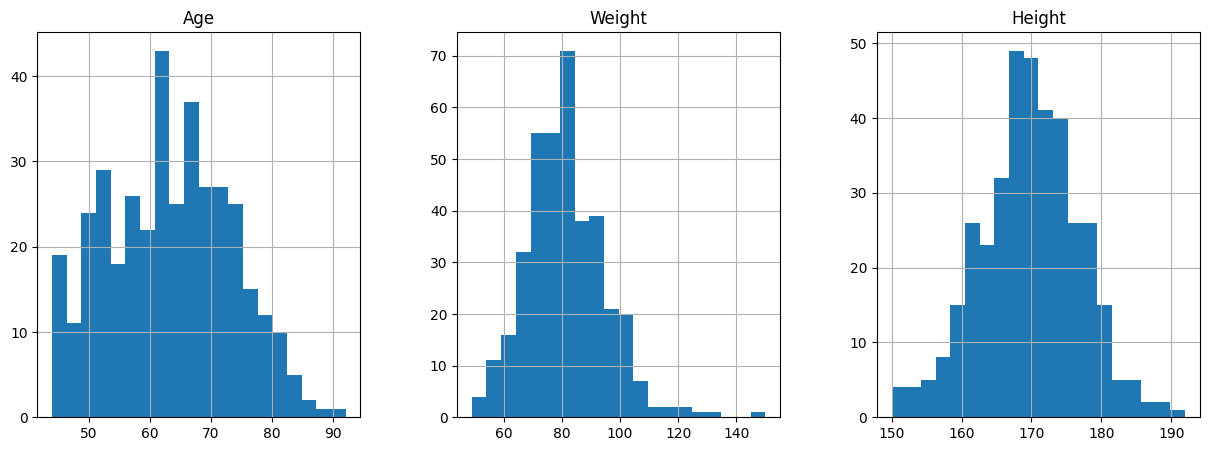

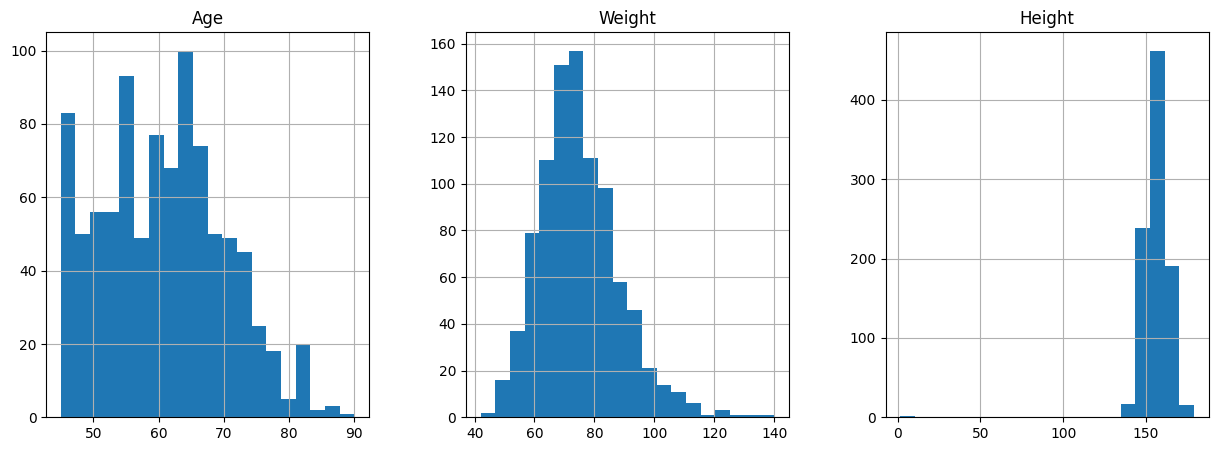

In [496]:
# Look at the histograms of the Age, Weight and Height
(figure, ravel_ax) = createGraph(1,3)
(figure, ravel_ax1) = createGraph(1,3)

columns_to_plot = ['Age', 'Weight', 'Height' ] 
for index, column in enumerate(columns_to_plot):
    df_male.hist(column=column, bins=20, ax=ravel_ax[index])
    df_female.hist(column=column, bins=20, ax=ravel_ax1[index])


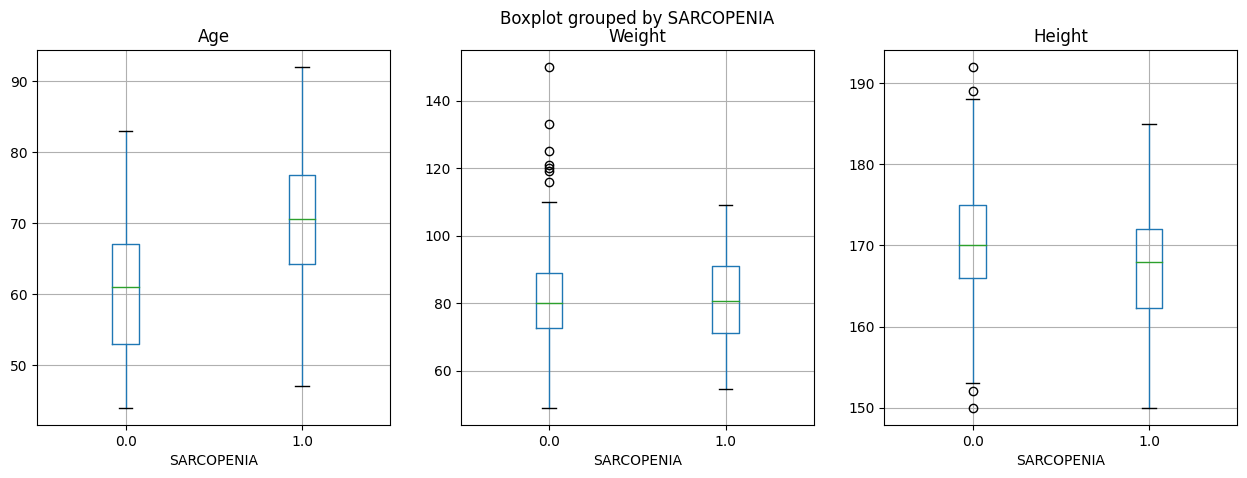

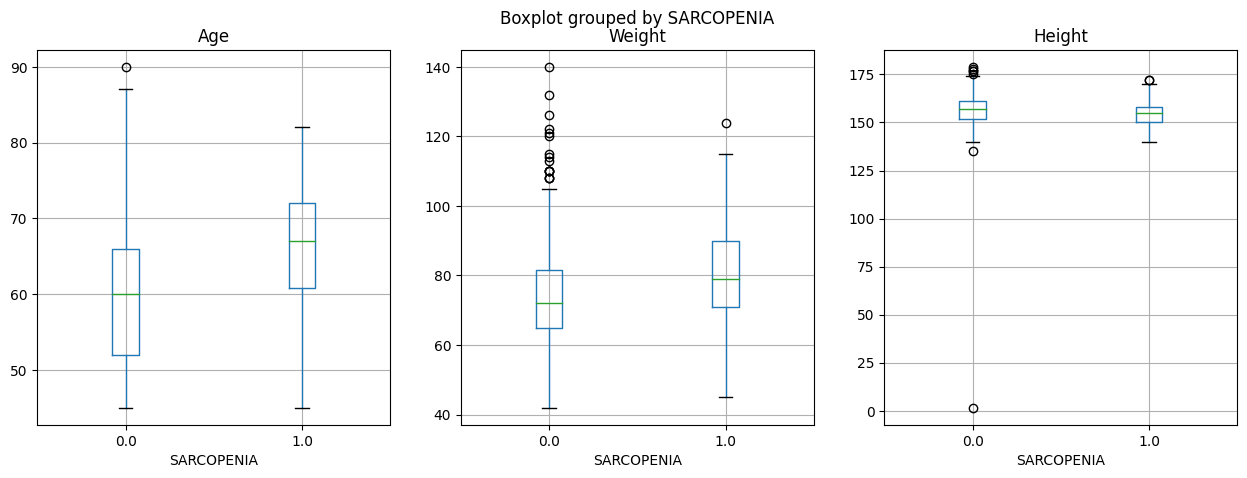

In [497]:
# Look at the Box plot to get a sense of the ouyliers and should Log and should be

(figure, ravel_ax) = createGraph(1,3)
(figure, ravel_ax1) = createGraph(1,3)

columns_to_plot = ['Age', 'Weight', 'Height' ] 
for index, column in enumerate(columns_to_plot):
    df_male.boxplot(column=column,   by='SARCOPENIA', ax=ravel_ax[index])
    df_female.boxplot(column=column, by='SARCOPENIA', ax=ravel_ax1[index])

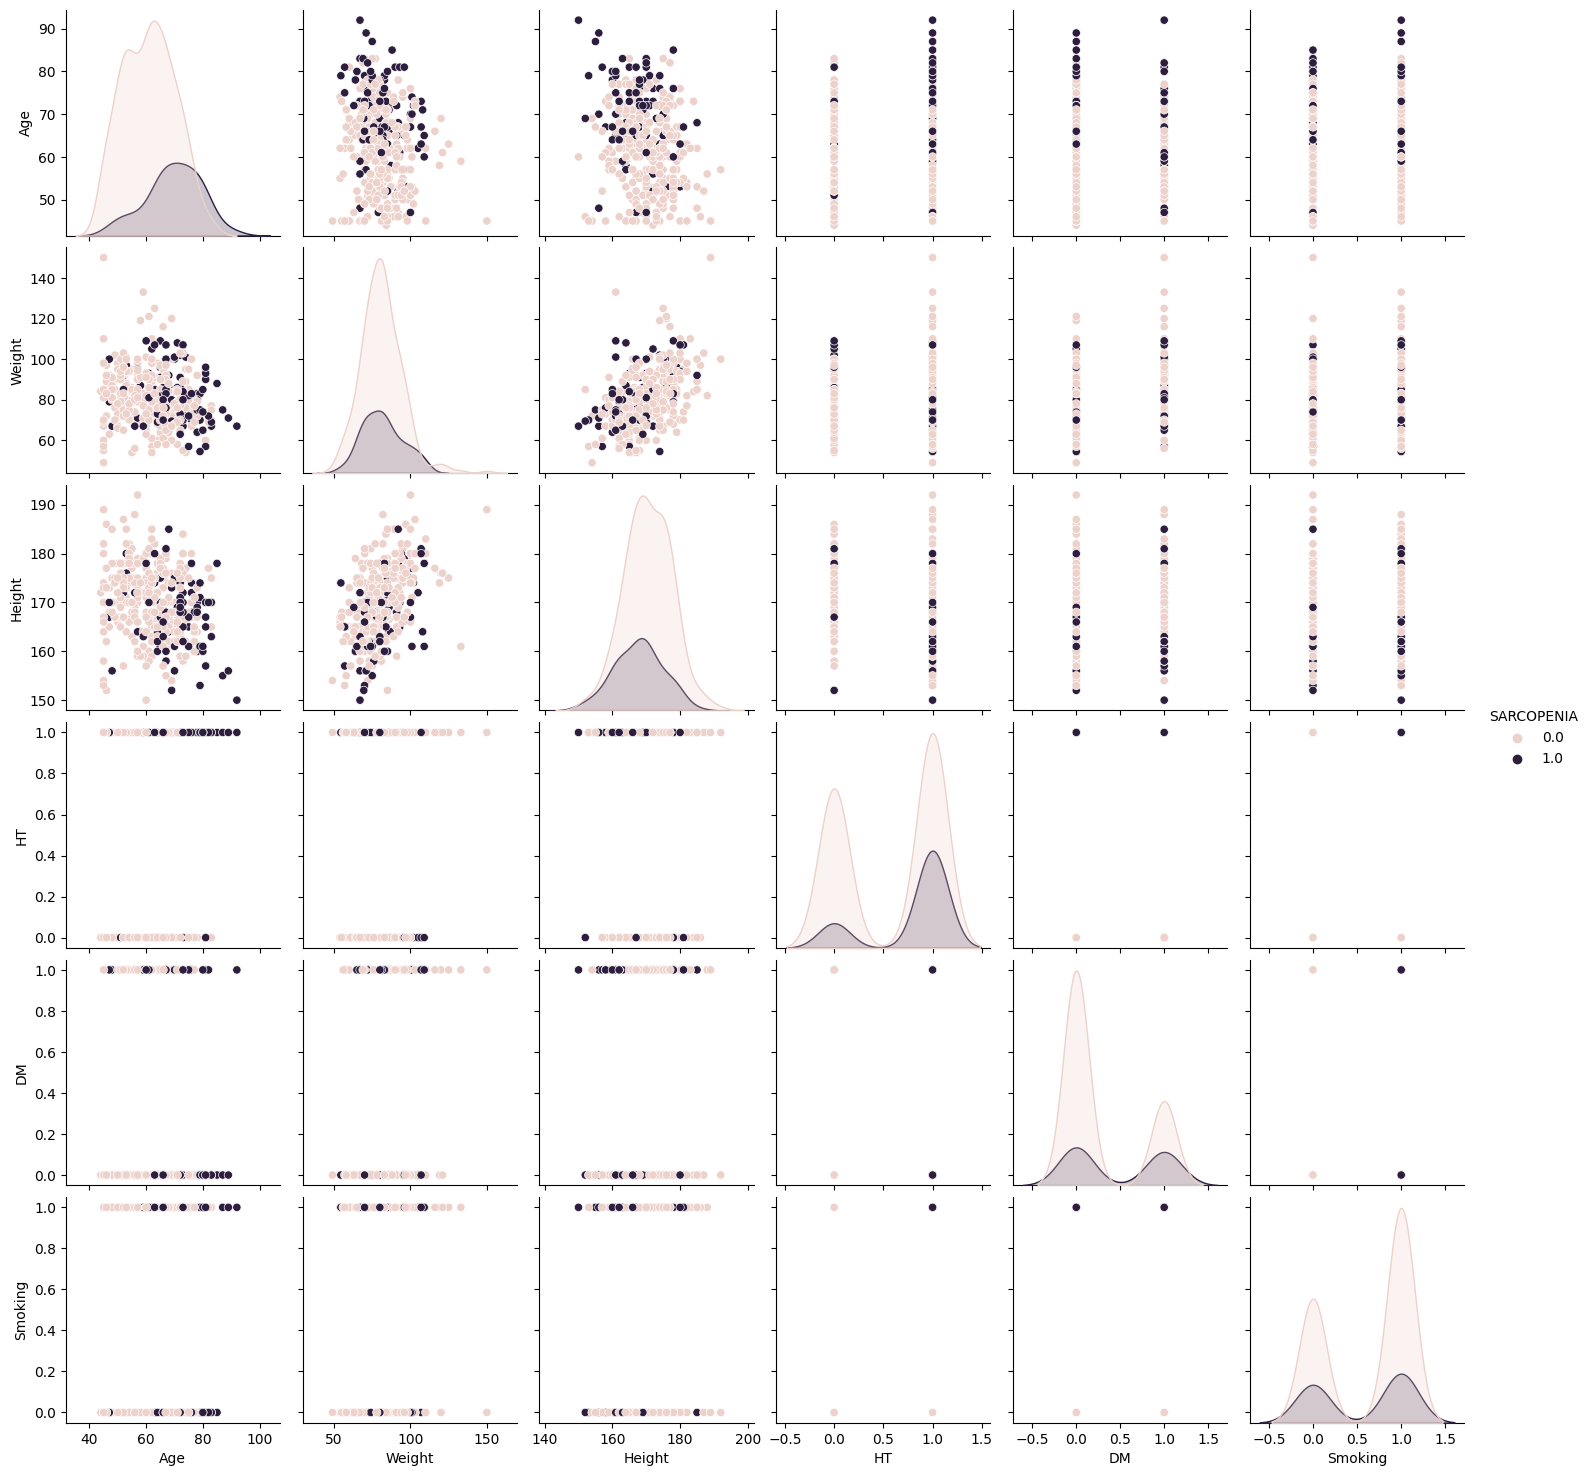

In [498]:
sns.pairplot(df_male, hue='SARCOPENIA')

# Notes on model improvement from doning research
> * Remove Outliers : Already Done as you have repeated we should always start with a simple model so I just removed the outliers
> * Remove Multicollinearity : Produce a Correlation diagram and did not see any linearlarity
> * Assert Lineary Assumption : Unsure when I did scatter there two rows ( A row for 0 and row for 1)
> * Assert Normal Distributin : In this class I learned that if it generally resembles Gaussian then it is.
> * Binary Output Variable : Done while cleaning the data: Change column to category

### Clean the Data  
> 0.  For all String fields convert to lowercase and remove white space
> 1.  Weight -- Remove rows where the column has a missing value
> 2.  Height -- Remove rows where the height has a missing value
> 3.  Exercise -- Note sure yet
> 4.  Education -- Create a new set of categorical parameters and create get dummies

<b>Question:</b> How should we handle preproessing the data ( lowercase, remove white space) Is there a way to do with a column transfromer

#### Clean the data in the dataframe
> 1. convert all string data to lower space and remove white space from each side
> 2. Education -- Decrease the String a set that be used as categories
> 3. Convert Exercise, HT, DM, Education, Smoking all to categorical
> 4. Drop gender since we have split the dataframe into two different dataframes

In [499]:
df_male_clean = cleanDataSet(df_male)
df_female_clean = cleanDataSet(df_female)
df_male_clean = cleanEducation(df_male_clean, 'Education')
df_female_clean = cleanEducation(df_female_clean, 'Education')

In [500]:
data_frames = [ df_male_clean, df_female_clean ]
for data_frame in data_frames:
    data_frame.Exercise = data_frame.Exercise.astype("category")
    data_frame.HT = data_frame.HT.astype("category")
    data_frame.DM = data_frame.DM.astype("category")
    data_frame.Education = data_frame.Education.astype("category")
    data_frame.Smoking = data_frame.DM.astype("category")
    data_frame.SARCOPENIA = data_frame.SARCOPENIA.astype("category")

In [501]:
column_info = info_about_columns(dataframe=df_male_clean, data_science_descriptions=None)
column_info

,DataType,# of Categories,categories/sample ratio,missing values,missing values %
Age,int64,44,12.0,0,0.000000
Weight,float64,71,19.0,1,0.263852
Height,float64,41,11.0,2,0.527704
Exercise,category,3,1.0,4,1.055409
HT,category,2,1.0,0,0.000000
DM,category,2,1.0,0,0.000000
Education,category,5,1.0,4,1.055409
Smoking,category,2,1.0,0,0.000000
Gender,string[python],1,0.0,0,0.000000
SARCOPENIA,category,2,1.0,1,0.263852


In [502]:
show_examples_of_data(dataframe=df_male_clean, data_information=column_info, category_cutoff=5)

,Field,Value,Number of Values
0,Age,44 to 92,NA
1,Weight,49.0 to 150.0,NA
2,Height,150.0 to 192.0,NA
3,Exercise,"['1-2/week', '3-4/week', '0', <NA>] Categories (3, string): [0, 1-2/week, 3-4/week]",4
4,HT,"[1, 0] Categories (2, int64): [0, 1]",2
5,DM,"[0, 1] Categories (2, int64): [0, 1]",2
6,Education,"['high_school', 'university', 'primary school', 'illiterate', 'junior_high', NaN] Categories (5, object): ['high_school', 'illiterate', 'junior_high', 'primary school', 'university']",6
7,Smoking,"[0, 1] Categories (2, int64): [0, 1]",2
8,Gender,[m],1
9,SARCOPENIA,"[0.0, 1.0, NaN] Categories (2, float64): [0.0, 1.0]",3


In [503]:
show_examples_of_data(dataframe=df_female_clean, data_information=column_info, category_cutoff=5)

,Field,Value,Number of Values
0,Age,45 to 90,NA
1,Weight,42.0 to 140.0,NA
2,Height,1.59 to 179.0,NA
3,Exercise,"['0', <NA>, '1-2/week', '3-4/week'] Categories (3, string): [0, 1-2/week, 3-4/week]",4
4,HT,"[0, 1] Categories (2, int64): [0, 1]",2
5,DM,"[0, 1] Categories (2, int64): [0, 1]",2
6,Education,"['high_school', NaN, 'illiterate', 'elementry', 'primary school', 'university', 'housewife', 'junior_high', 'none', 'worker'] Categories (9, object): ['elementry', 'high_school', 'housewife', 'illiterate', ..., 'none', 'primary school', 'university', 'worker']",10
7,Smoking,"[0, 1] Categories (2, int64): [0, 1]",2
8,Gender,[f],1
9,SARCOPENIA,"[0.0, 1.0] Categories (2, float64): [0.0, 1.0]",2


In [504]:
### Remove any featueres that have a positive/negative correlation of .9 or highter

# Analysis : There is nothing with either a very positive or negative correlation.

# Coorelation 
Since I am new to Data Science I want a high correlation to remove a feature ( Correlation of .9 or greater)

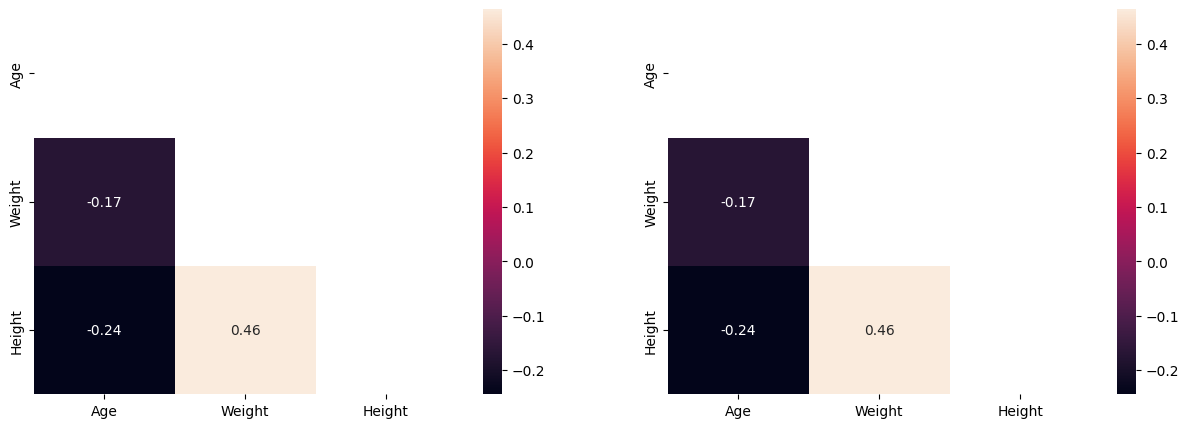

In [505]:
(fiure, ax) = createGraph(1,2)

createHeatMap(df_male,0)
createHeatMap(df_female,1)

In [506]:
## Saving the model so another model can use the data

In [507]:
## Store the datafrmaes for both male and female 
## Get rid of the gender will only be used for merging model in different notebooks.  It is no longer needed
df_male_clean.reset_index(drop=True)
df_female_clean.reset_index(drop=True)

df_female_clean.to_csv('model_1_female.csv')
df_male_clean.to_csv('model_1_male.csv')

df_male_clean = df_male_clean.drop('Gender', axis=1)
df_female_clean = df_female_clean.drop('Gender', axis=1)

### Remove any rows where any column has no data
I would have put this into a column transformer, but an Imputer will not remove rows and of the guiding idas was to create a model quickly and optimize at later time.

In [508]:
original_size_male = df_male_clean.shape
df_male_clean = df_male_clean.dropna(axis=0)
new_size_male = df_male_clean.shape
print("Male Original/New", original_size_male, new_size_male)

Male Original/New (379, 9) (373, 9)


In [509]:
original_size_female = df_female_clean.shape
df_female_clean = df_female_clean.dropna(axis=0)
new_size_female = df_female_clean.shape
print("Female Original/New", original_size_female, new_size_female)

Female Original/New (924, 9) (908, 9)


In [510]:
## Machine Language processing 

In [511]:
## Create Training Set and graph the balance/inbalance of the dataset

In [512]:
# Create the Training and Datasets
(XTrain_female, XTest_female, yTrain_female, yTest_female) = createTestTrainData(dataframe=df_female_clean, test_size=.25)
(XTrain_male,   XTest_male,   yTrain_male,   yTest_male)   = createTestTrainData(dataframe=df_male_clean, test_size=.25) 

In [513]:
## Analyzing the Balancing/Inbalancing

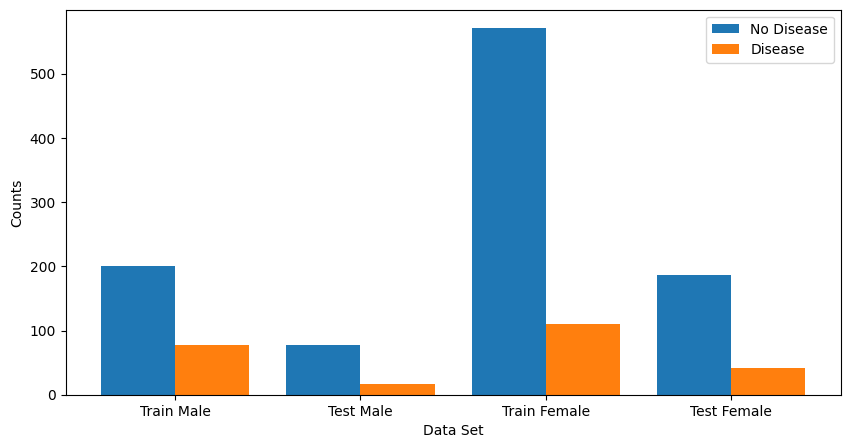

In [514]:
# Show the counts for the disease 
columns = ["Traing Male", "Test Male", "Train Female", "Test Female"]
showBalanceOfDataset(columns, yTrain_male, yTest_male, yTrain_female, yTest_female) 

## Analysis of creating the Training/Testing for the Dataset.

The dataset is out of whack.  It is definietly unbalanced.   However, I have decided to move on and take this into account later.
Usually I would remove data, but in this case, I may want to create new data since the counts of the disease is so null.  However,
this was mentioned in class

In [515]:
### Create the Column Transofrmers -- I wanted to put all the preproccessing here, but could not delete rows in a column transformer

In [516]:
# column_transforms_list = [
#     ("encoding", OneHotEncoder(), ["Exercise","HT","DM", "Education", "Smoking"])
# ]
    
columnTransformer = ColumnTransformer([
    ('normalization', MinMaxScaler(), ["Age"]),
    ('standard scalar', StandardScaler(), [ "Height", "Weight" ]),
    ('one hot encoding', OneHotEncoder(handle_unknown='ignore'), [ "HT", "Education", "DM", "Smoking", "Exercise"])
],remainder='passthrough')

In [517]:
# Lets take a look at LogisticRegresson

# The first test must select the solver since the the penalty hyperparameter must have the correct vslues for the 
# solver hyperparameter.  If the solver is invalid for the penalty then an error error generated and the training
# and test sets would return NaN instead of percentage correct.  Optimize for this parameter first then the others.
# Two parameter dictionaries will need so that we can evaluate each solver without any issues.

parameters1 = {
    "logisticRegression__solver": [ 'newton-cholesky', 'newton-cg', 'liblinear', 'sag', 'saga']
}

parameters2 = {
      "logisticRegression__solver": [ 'lbfgs' ]
}

# I have choose to use 'lbfgs' since newton-cg had very close or the same scores for taining, testing and accuracy.
# Also lbfg is less memory intensive

parameters3 = {
     'logisticRegression__penalty': [ 'l2', None],
     'logisticRegression__C': [ 1000, 100, 10, 1, 0.1, .01 ],
     'logisticRegression__class_weight' : [ None, 'balanced']
}

# Make the PipeLine 
pipeline = Pipeline(
     [
         ( "Column Transformers", columnTransformer),
         ( "logisticRegression", LogisticRegression(max_iter=8000, solver="lbfgs"))
     ])

grid_male_list = []
grid_female_list = []
y_predictions_male_list = []
y_predictions_female_list = []

experiments = [ parameters1, parameters2, parameters3 ]
for experiment in experiments:
    (grid, y_predictions_male) = trainTestScore(pipeline, experiment, 10, (XTrain_male, yTrain_male), (XTest_male, yTest_male))
    (grid2, y_predictions_female) = trainTestScore(pipeline, experiment, 10, (XTrain_female, yTrain_female), (XTest_female, yTest_female))

    grid_male_list.append(grid)
    grid_female_list.append(grid2)
    y_predictions_male_list.append(y_predictions_male)
    y_predictions_female_list.append(y_predictions_female)


# pipeline

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10] END logisticRegression__solver=newton-cholesky;, score=(train=0.773, test=0.786) total time=   0.0s
[CV 2/10] END logisticRegression__solver=newton-cholesky;, score=(train=0.769, test=0.714) total time=   0.0s
[CV 3/10] END logisticRegression__solver=newton-cholesky;, score=(train=0.777, test=0.643) total time=   0.0s
[CV 4/10] END logisticRegression__solver=newton-cholesky;, score=(train=0.781, test=0.750) total time=   0.0s
[CV 5/10] END logisticRegression__solver=newton-cholesky;, score=(train=0.757, test=0.821) total time=   0.0s
[CV 6/10] END logisticRegression__solver=newton-cholesky;, score=(train=0.745, test=0.786) total time=   0.0s
[CV 7/10] END logisticRegression__solver=newton-cholesky;, score=(train=0.757, test=0.750) total time=   0.0s
[CV 8/10] END logisticRegression__solver=newton-cholesky;, score=(train=0.761, test=0.786) total time=   0.0s
[CV 9/10] END logisticRegression__solver=newton-cholesky;, 

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 2/10] END logisticRegression__C=1000, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.697, test=0.643) total time=   0.0s
[CV 3/10] END logisticRegression__C=1000, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.713, test=0.607) total time=   0.0s
[CV 4/10] END logisticRegression__C=1000, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.685, test=0.750) total time=   0.0s
[CV 5/10] END logisticRegression__C=1000, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.697, test=0.714) total time=   0.0s
[CV 6/10] END logisticRegression__C=1000, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.709, test=0.750) total time=   0.0s
[CV 7/10] END logisticRegression__C=1000, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.697, test=0.714) total

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 8/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.769, test=0.786) total time=   0.0s
[CV 9/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.777, test=0.643) total time=   0.0s
[CV 10/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.790, test=0.704) total time=   0.0s
[CV 1/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.757, test=0.786) total time=   0.0s
[CV 2/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.761, test=0.786) total time=   0.0s
[CV 3/10] END logisticRegression__C=100, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.793, test=0.643) total time=   0.0s
[CV 4/10]

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 3/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.713, test=0.607) total time=   0.0s
[CV 4/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.685, test=0.750) total time=   0.0s
[CV 5/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.697, test=0.714) total time=   0.0s
[CV 6/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.709, test=0.750) total time=   0.0s
[CV 7/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.697, test=0.714) total time=   0.0s
[CV 8/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.705, test=0.714)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 9/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.777, test=0.643) total time=   0.0s
[CV 10/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.790, test=0.704) total time=   0.0s
[CV 1/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.693, test=0.714) total time=   0.0s
[CV 2/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.697, test=0.643) total time=   0.0s
[CV 3/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.709, test=0.607) total time=   0.0s
[CV 4/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.681, test=0.750) total time=   0.0s
[

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/10] END logisticRegression__C=1, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.781, test=0.750) total time=   0.0s
[CV 5/10] END logisticRegression__C=1, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.757, test=0.821) total time=   0.0s
[CV 6/10] END logisticRegression__C=1, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.745, test=0.786) total time=   0.0s
[CV 7/10] END logisticRegression__C=1, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.757, test=0.750) total time=   0.0s
[CV 8/10] END logisticRegression__C=1, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.761, test=0.786) total time=   0.0s
[CV 9/10] END logisticRegression__C=1, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.785, test=0.679) total time=   0.0s
[CV 10/10] END logisticRegre

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 7/10] END logisticRegression__C=0.1, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.773, test=0.857) total time=   0.0s
[CV 8/10] END logisticRegression__C=0.1, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.769, test=0.786) total time=   0.0s
[CV 9/10] END logisticRegression__C=0.1, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.777, test=0.643) total time=   0.0s
[CV 10/10] END logisticRegression__C=0.1, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.790, test=0.704) total time=   0.0s
[CV 1/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.669, test=0.786) total time=   0.0s
[CV 2/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.677, test=0.714) total time=   0.0s

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 3/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.721, test=0.714) total time=   0.0s
[CV 4/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.721, test=0.714) total time=   0.0s
[CV 5/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.721, test=0.714) total time=   0.0s
[CV 6/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.721, test=0.714) total time=   0.0s
[CV 7/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.721, test=0.714) total time=   0.0s
[CV 8/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.721, test=0.714) total time=   0.0s
[CV 9/10] 

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 5/10] END logisticRegression__C=1000, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.835, test=0.824) total time=   0.0s
[CV 6/10] END logisticRegression__C=1000, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.835, test=0.838) total time=   0.0s
[CV 7/10] END logisticRegression__C=1000, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.840, test=0.809) total time=   0.0s
[CV 8/10] END logisticRegression__C=1000, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.834, test=0.838) total time=   0.0s
[CV 9/10] END logisticRegression__C=1000, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.829, test=0.853) total time=   0.0s
[CV 10/10] END logisticRegression__C=1000, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.835, test=0.809) total time=   0.0s
[CV 1/10]

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 4/10] END logisticRegression__C=1000, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.837, test=0.824) total time=   0.0s
[CV 5/10] END logisticRegression__C=1000, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.835, test=0.824) total time=   0.0s
[CV 6/10] END logisticRegression__C=1000, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.835, test=0.838) total time=   0.0s
[CV 7/10] END logisticRegression__C=1000, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.840, test=0.809) total time=   0.0s
[CV 8/10] END logisticRegression__C=1000, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.834, test=0.838) total time=   0.0s
[CV 9/10] END logisticRegression__C=1000, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.829, test=0.853) total time=   0.0

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/10] END logisticRegression__C=1000, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.708, test=0.706) total time=   0.0s
[CV 5/10] END logisticRegression__C=1000, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.718, test=0.559) total time=   0.0s
[CV 6/10] END logisticRegression__C=1000, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.703, test=0.750) total time=   0.0s
[CV 7/10] END logisticRegression__C=1000, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.711, test=0.706) total time=   0.0s
[CV 8/10] END logisticRegression__C=1000, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.711, test=0.750) total time=   0.0s
[CV 9/10] END logisticRegression__C=1000, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.716, test=0.706) total

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 3/10] END logisticRegression__C=1000, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.728, test=0.691) total time=   0.0s
[CV 4/10] END logisticRegression__C=1000, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.708, test=0.706) total time=   0.0s
[CV 5/10] END logisticRegression__C=1000, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.718, test=0.559) total time=   0.0s
[CV 6/10] END logisticRegression__C=1000, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.703, test=0.750) total time=   0.0s
[CV 7/10] END logisticRegression__C=1000, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.713, test=0.706) total time=   0.0s
[CV 8/10] END logisticRegression__C=1000, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.711, test=

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 1/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.701, test=0.710) total time=   0.0s
[CV 2/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.711, test=0.735) total time=   0.0s
[CV 3/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.728, test=0.676) total time=   0.0s
[CV 4/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.708, test=0.706) total time=   0.0s
[CV 5/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.716, test=0.559) total time=   0.0s
[CV 6/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.705, test=0.750) total time=

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 10/10] END logisticRegression__C=100, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.713, test=0.750) total time=   0.0s
[CV 1/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.824, test=0.841) total time=   0.0s
[CV 2/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.837, test=0.824) total time=   0.0s
[CV 3/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.842, test=0.809) total time=   0.0s
[CV 4/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.837, test=0.838) total time=   0.0s
[CV 5/10] END logisticRegression__C=10, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.838, test=0.809) total time=   0.0s
[CV 6/10] END 

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 1/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.706, test=0.710) total time=   0.0s
[CV 2/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.711, test=0.721) total time=   0.0s
[CV 3/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.726, test=0.676) total time=   0.0s
[CV 4/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.706, test=0.676) total time=   0.0s
[CV 5/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.723, test=0.559) total time=   0.0s
[CV 6/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.708, test=0.750) total time=   0.0

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 1/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.701, test=0.710) total time=   0.0s
[CV 2/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.711, test=0.735) total time=   0.0s
[CV 3/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.728, test=0.691) total time=   0.0s
[CV 4/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.708, test=0.706) total time=   0.0s
[CV 5/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.718, test=0.559) total time=   0.0s
[CV 6/10] END logisticRegression__C=10, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.703, test=0.750) total

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/10] END logisticRegression__C=1, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.830, test=0.826) total time=   0.0s
[CV 2/10] END logisticRegression__C=1, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.830, test=0.838) total time=   0.0s
[CV 3/10] END logisticRegression__C=1, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.837, test=0.824) total time=   0.0s
[CV 4/10] END logisticRegression__C=1, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.834, test=0.824) total time=   0.0s
[CV 5/10] END logisticRegression__C=1, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.837, test=0.809) total time=   0.0s
[CV 6/10] END logisticRegression__C=1, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.832, test=0.853) total time=   0.0s
[CV 7/10] END logisticRegres

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 9/10] END logisticRegression__C=0.1, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.829, test=0.853) total time=   0.0s
[CV 10/10] END logisticRegression__C=0.1, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.835, test=0.809) total time=   0.0s
[CV 1/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.688, test=0.681) total time=   0.0s
[CV 2/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.693, test=0.706) total time=   0.0s
[CV 3/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.700, test=0.632) total time=   0.0s
[CV 4/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=l2;, score=(train=0.695, test=0.632) total time=   

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 1/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.701, test=0.710) total time=   0.0s
[CV 2/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.711, test=0.735) total time=   0.0s
[CV 3/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.728, test=0.691) total time=   0.0s
[CV 4/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.708, test=0.706) total time=   0.0s
[CV 5/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.718, test=0.559) total time=   0.0s
[CV 6/10] END logisticRegression__C=0.1, logisticRegression__class_weight=balanced, logisticRegression__penalty=None;, score=(train=0.703, test=0.750)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.838, test=0.826) total time=   0.0s
[CV 2/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.837, test=0.838) total time=   0.0s
[CV 3/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.837, test=0.838) total time=   0.0s
[CV 4/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.837, test=0.838) total time=   0.0s
[CV 5/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.837, test=0.838) total time=   0.0s
[CV 6/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=l2;, score=(train=0.837, test=0.838) total time=   0.0s
[CV 7/10] 

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

[CV 3/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.835, test=0.794) total time=   0.0s
[CV 4/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.837, test=0.824) total time=   0.0s
[CV 5/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.835, test=0.824) total time=   0.0s
[CV 6/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.835, test=0.838) total time=   0.0s
[CV 7/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.840, test=0.809) total time=   0.0s
[CV 8/10] END logisticRegression__C=0.01, logisticRegression__class_weight=None, logisticRegression__penalty=None;, score=(train=0.834, test=0.838) total time=   0.0

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

Analysis of Males for experiment 0
The Training Score is  0.77
The Test     Score is  0.75
Accuracy     Score is  0.84
Precision    Score is  0.57
Recall       Score is  0.25
best               is  {'logisticRegression__solver': 'newton-cholesky'}


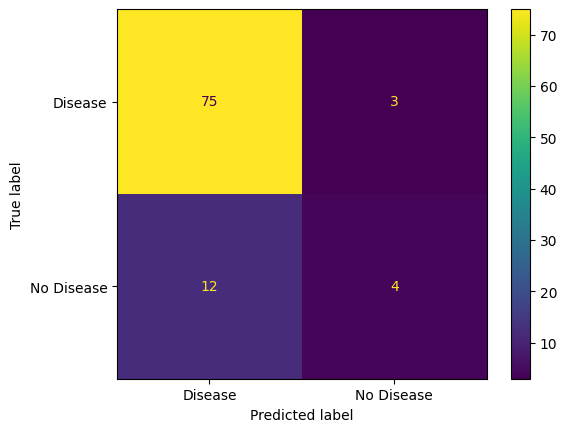

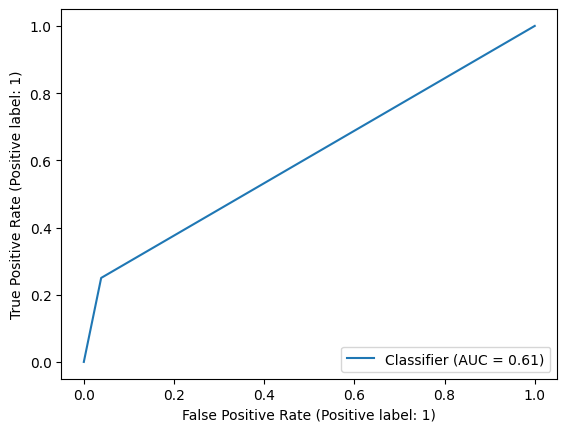

Analysis of Females for experiment 0
The Training Score is  0.83
The Test     Score is  0.83
Accuracy     Score is  0.83
Precision    Score is  0.67
Recall       Score is  0.15
best               is  {'logisticRegression__solver': 'liblinear'}


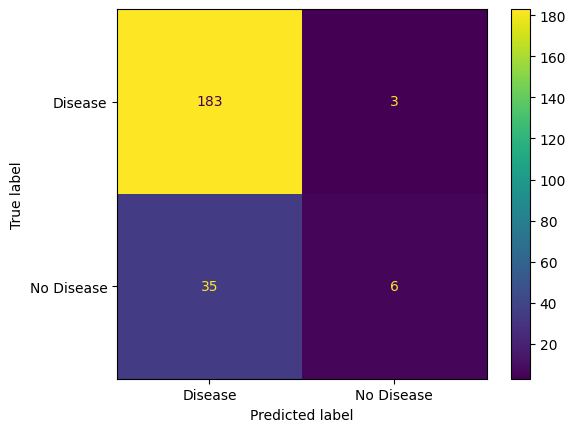

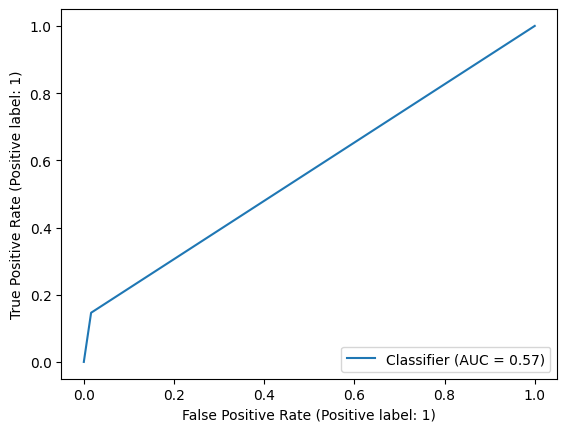

Analysis of Males for experiment 1
The Training Score is  0.77
The Test     Score is  0.75
Accuracy     Score is  0.84
Precision    Score is  0.57
Recall       Score is  0.25
best               is  {'logisticRegression__solver': 'lbfgs'}


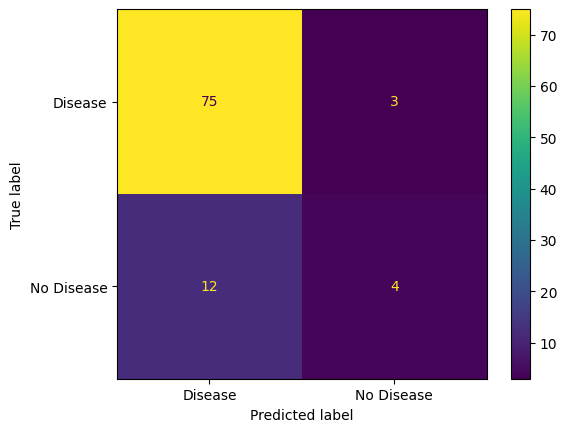

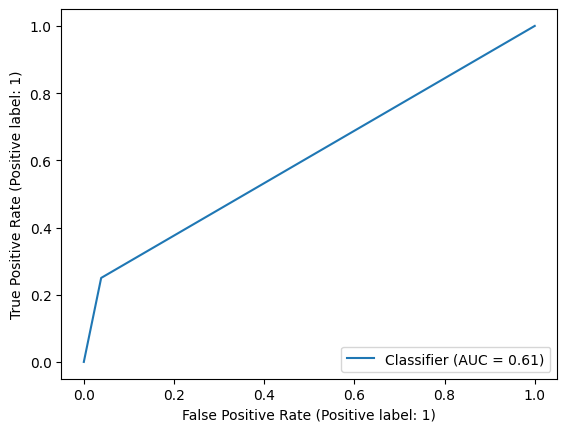

Analysis of Females for experiment 1
The Training Score is  0.83
The Test     Score is  0.83
Accuracy     Score is  0.83
Precision    Score is  0.67
Recall       Score is  0.15
best               is  {'logisticRegression__solver': 'lbfgs'}


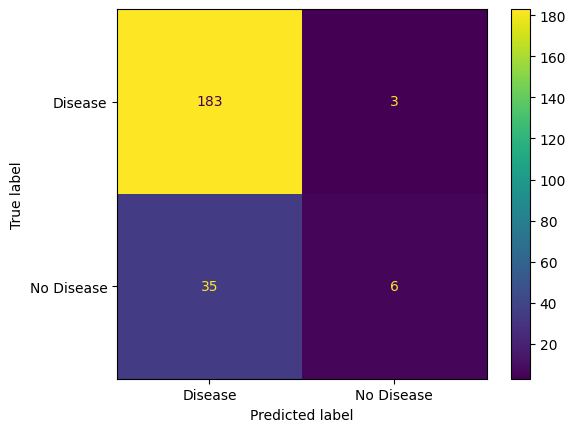

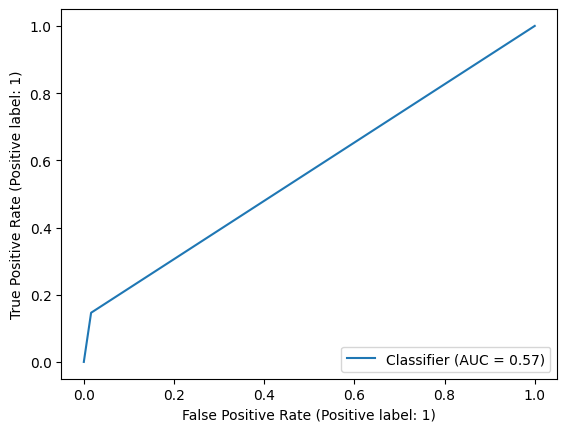

Analysis of Males for experiment 2
The Training Score is  0.77
The Test     Score is  0.76
Accuracy     Score is  0.82
Precision    Score is  0.46
Recall       Score is  0.38
best               is  {'logisticRegression__C': 1000, 'logisticRegression__class_weight': None, 'logisticRegression__penalty': 'l2'}


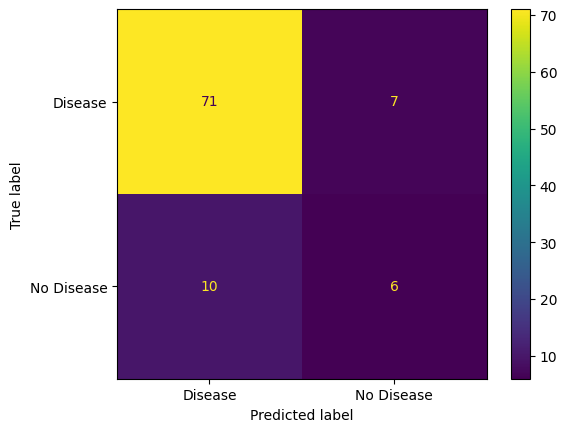

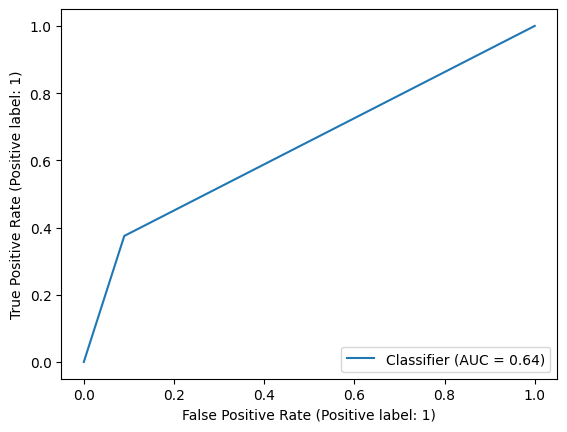

Analysis of Females for experiment 2
The Training Score is  0.83
The Test     Score is  0.83
Accuracy     Score is  0.82
Precision    Score is  1.0
Recall       Score is  0.0
best               is  {'logisticRegression__C': 0.01, 'logisticRegression__class_weight': None, 'logisticRegression__penalty': 'l2'}


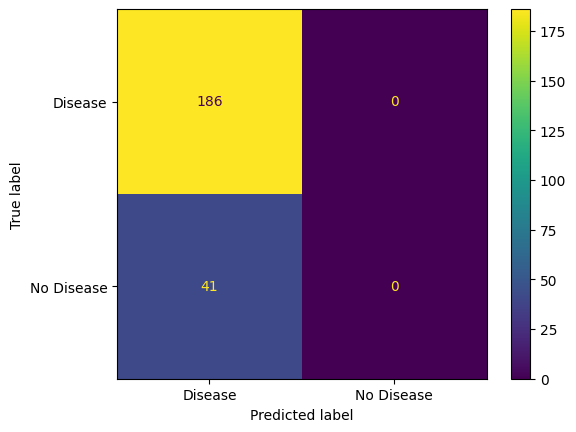

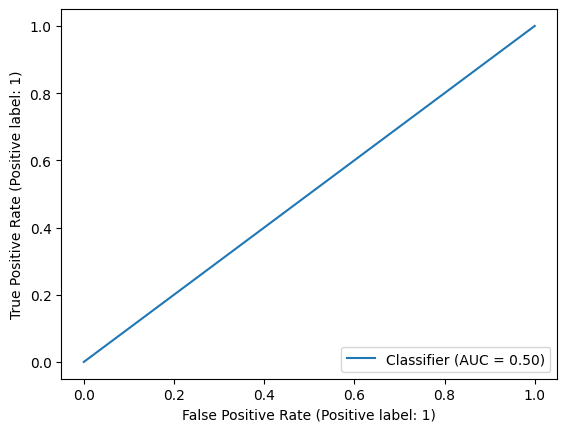

In [518]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for index in range(0,len(experiments)):
    print("Analysis of Males for experiment", index)
    results(grid_male_list[index], 'logisticRegression', XTest_male, yTest_male, y_predictions_male_list[index], model_1_logistic_male, "h_model_1_logistic_male")

    print("Analysis of Females for experiment", index)    
    results(grid_female_list[index], 'logisticRegression', XTest_female, yTest_female, y_predictions_female_list[index], model_1_logistic_female, "h_model_1_logistic_female")

Feature Engineering


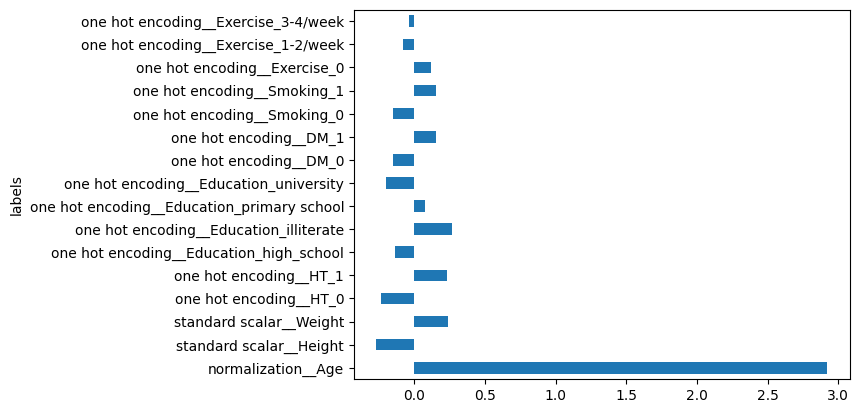

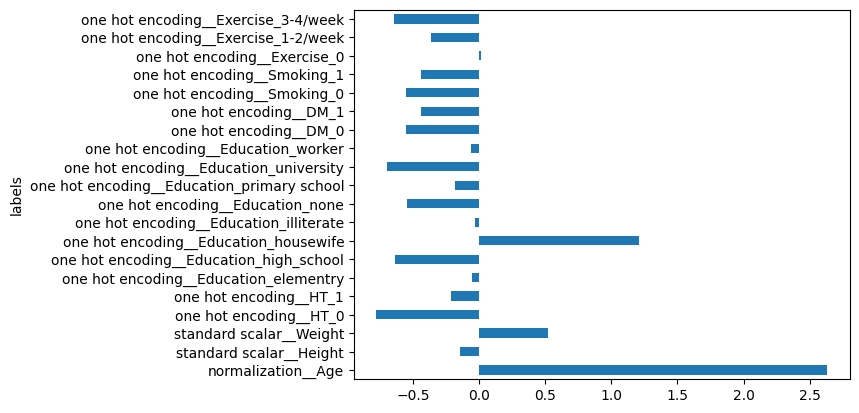

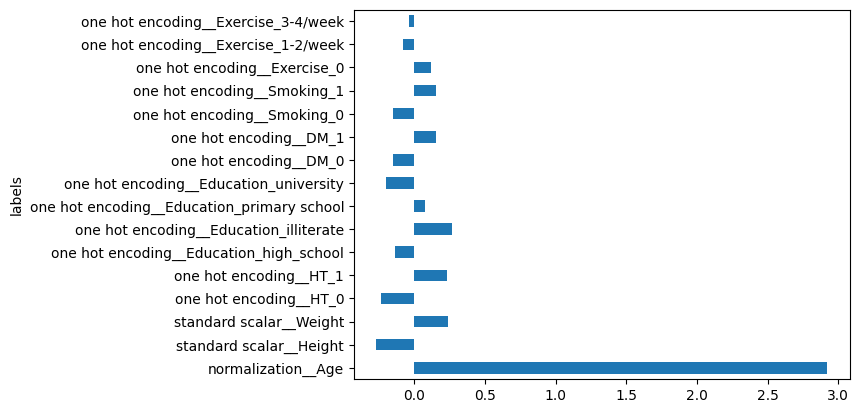

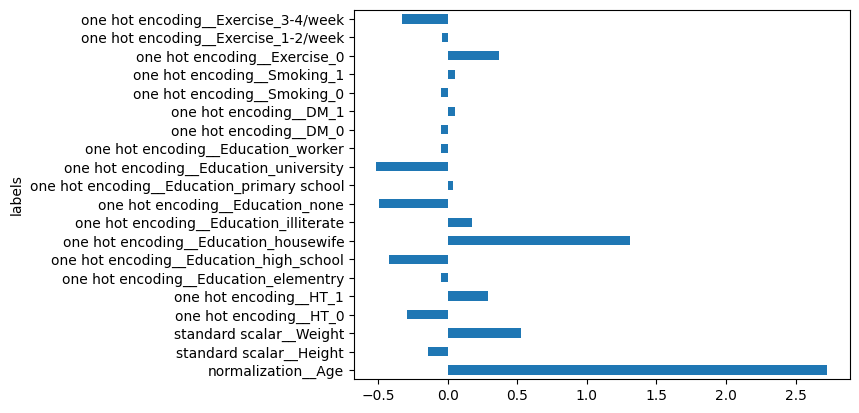

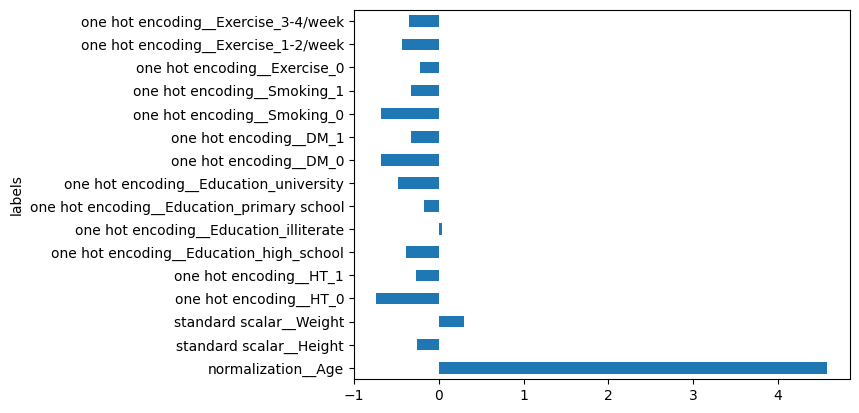

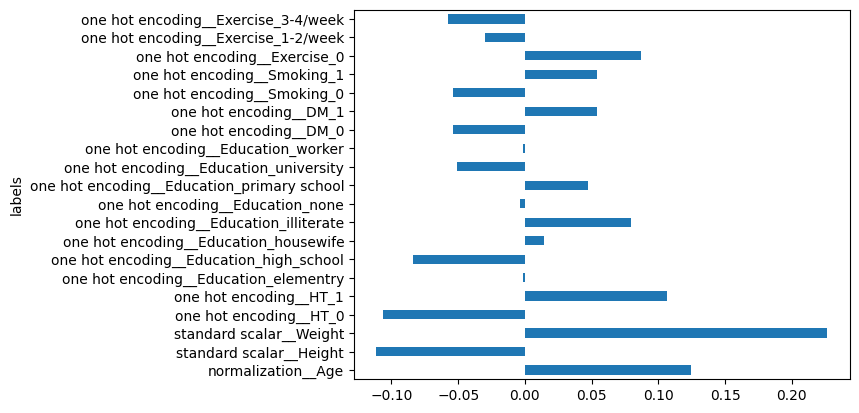

In [519]:
print("Feature Engineering")

for index in range(0,len(experiments)):
    feature(grid_male_list[index])
    feature(grid_female_list[index])

In [520]:
# print("Historical Results for females")
getDataFrame("h_model_1_logistic_female")

,Best Parameters,Training Score,Testing Score,Accuracy,Precision,Recall
0,{'logisticRegression__solver': 'liblinear'},0.83,0.83,0.83,0.67,0.15
1,{'logisticRegression__solver': 'lbfgs'},0.83,0.83,0.83,0.67,0.15
2,"{'logisticRegression__C': 0.01, 'logisticRegression__class_weight': None, 'logisticRegression__penalty': 'l2'}",0.83,0.83,0.82,1.00,0.00


In [521]:
# print("Historical Results for males")
getDataFrame("h_model_1_logistic_male")

,Best Parameters,Training Score,Testing Score,Accuracy,Precision,Recall
0,{'logisticRegression__solver': 'newton-cholesky'},0.77,0.75,0.84,0.57,0.25
1,{'logisticRegression__solver': 'lbfgs'},0.77,0.75,0.84,0.57,0.25
2,"{'logisticRegression__C': 1000, 'logisticRegression__class_weight': None, 'logisticRegression__penalty': 'l2'}",0.77,0.76,0.82,0.46,0.38


In [522]:
from sklearn.ensemble import RandomForestClassifier

# Make the PipeLine 
pipeline = Pipeline(
    [
        ( "Column Transformers", columnTransformer),
        ( "RandomForest", RandomForestClassifier(n_jobs=-1))
    ])

# Get the default case
parameters1 = {}

parameters2 = {
    'RandomForest__n_estimators': [100,500,750],
    'RandomForest__max_features': [ 'sqrt', "log2", 18],
    'RandomForest__max_depth': [None, 5, 10],
    'RandomForest__max_samples': [10, 15]
}

grid_male_list = []
grid_female_list = []
prediction_male_list = []
prediction_female_list = []

experiments = [ parameters1, parameters2 ]
for experiment in experiments:
    (grid, y_predictions_male) = trainTestScore(pipeline,   experiment, 10, (XTrain_male, yTrain_male), (XTest_male, yTest_male))
    (grid2, y_predictions_female) = trainTestScore(pipeline,  experiment, 10, (XTrain_female, yTrain_female), (XTest_female, yTest_female))

    grid_male_list.append(grid)
    grid_female_list.append(grid2)
    prediction_male_list.append(y_predictions_male)
    prediction_female_list.append(y_predictions_female)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END .............., score=(train=1.000, test=0.750) total time=   0.7s
[CV 2/10] END .............., score=(train=1.000, test=0.750) total time=   0.0s
[CV 3/10] END .............., score=(train=1.000, test=0.571) total time=   0.0s
[CV 4/10] END .............., score=(train=1.000, test=0.750) total time=   0.0s
[CV 5/10] END .............., score=(train=1.000, test=0.750) total time=   0.0s
[CV 6/10] END .............., score=(train=1.000, test=0.786) total time=   0.0s
[CV 7/10] END .............., score=(train=1.000, test=0.750) total time=   0.0s
[CV 8/10] END .............., score=(train=1.000, test=0.750) total time=   0.0s
[CV 9/10] END .............., score=(train=1.000, test=0.750) total time=   0.0s
[CV 10/10] END ............., score=(train=1.000, test=0.630) total time=   0.0s
(94, 8)
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END .............., score=(train=1.000, test=0.797

The Training Score is  1.0
The Test     Score is  0.72
Accuracy     Score is  0.83
Precision    Score is  0.5
Recall       Score is  0.38
best               is  {}


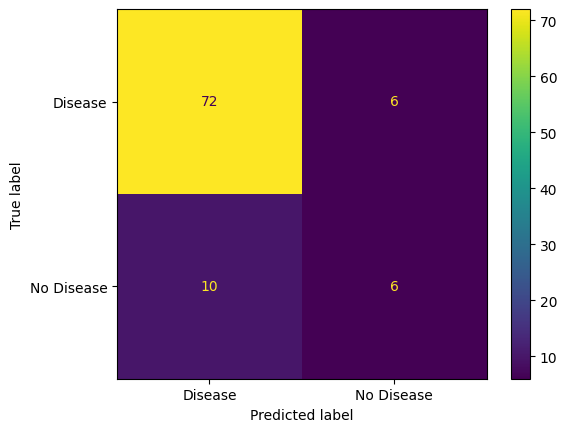

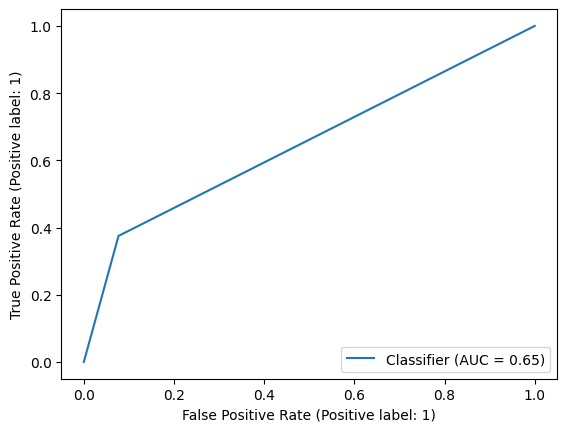

The Training Score is  1.0
The Test     Score is  0.81
Accuracy     Score is  0.81
Precision    Score is  0.43
Recall       Score is  0.15
best               is  {}


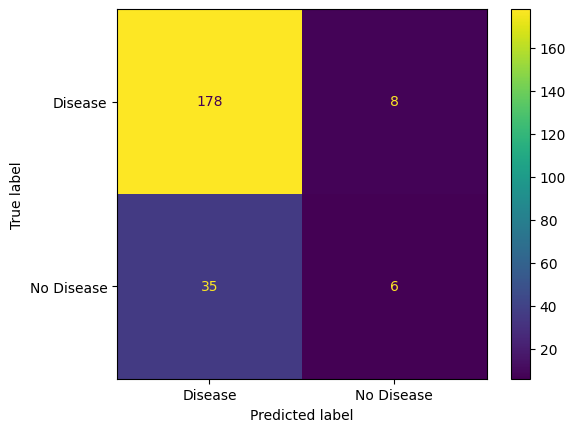

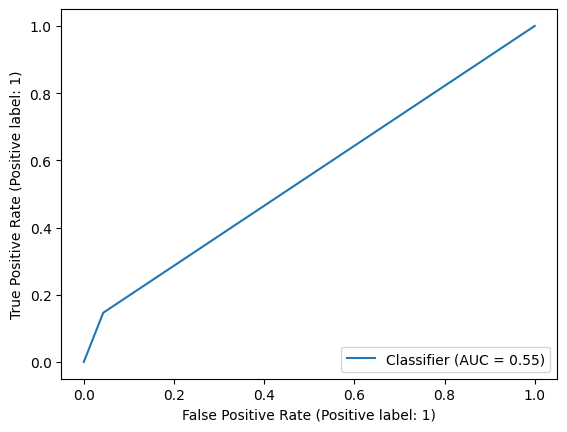

The Training Score is  0.73
The Test     Score is  0.73
Accuracy     Score is  0.84
Precision    Score is  0.56
Recall       Score is  0.31
best               is  {'RandomForest__max_depth': 10, 'RandomForest__max_features': 18, 'RandomForest__max_samples': 15, 'RandomForest__n_estimators': 100}


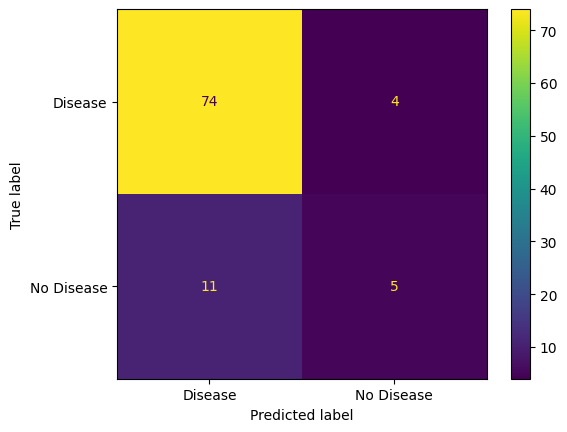

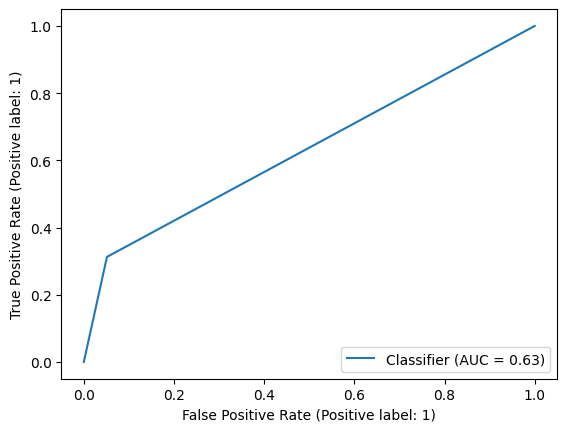

The Training Score is  0.84
The Test     Score is  0.84
Accuracy     Score is  0.83
Precision    Score is  1.0
Recall       Score is  0.07
best               is  {'RandomForest__max_depth': None, 'RandomForest__max_features': 18, 'RandomForest__max_samples': 15, 'RandomForest__n_estimators': 100}


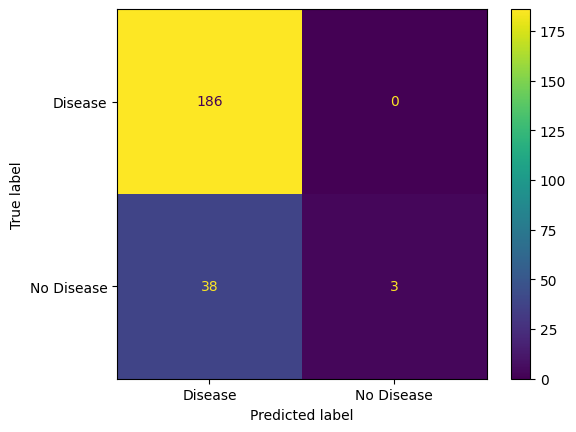

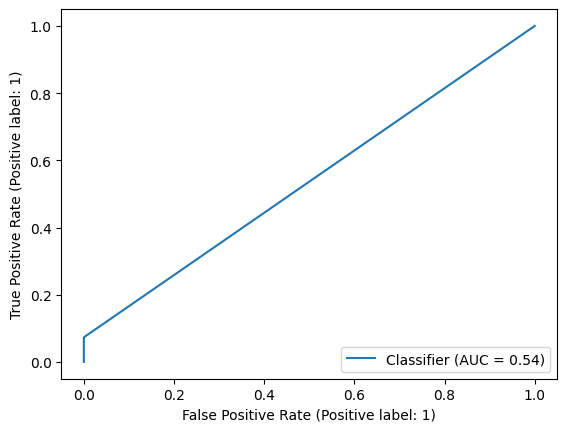

In [523]:
for index in range(0,len(experiments)):
    results(grid_male_list[index],  "RandomForest", XTest_male, yTest_male, prediction_male_list[index], model_1_forest_female, "h_model_1_forest_male")
    results(grid_female_list[index], "RandomForest", XTest_female, yTest_female, prediction_female_list[index], model_1_forest_male, "h_model_1_forest_female")


model =  <class 'sklearn.ensemble._forest.RandomForestClassifier'>
model =  <class 'sklearn.ensemble._forest.RandomForestClassifier'>
model =  <class 'sklearn.ensemble._forest.RandomForestClassifier'>
model =  <class 'sklearn.ensemble._forest.RandomForestClassifier'>


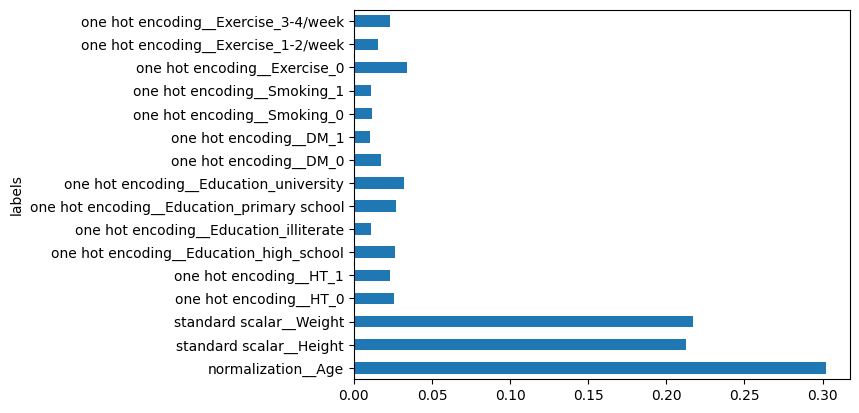

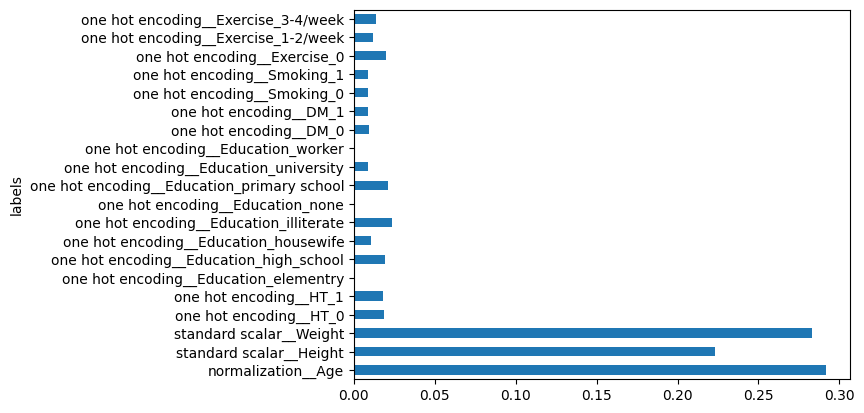

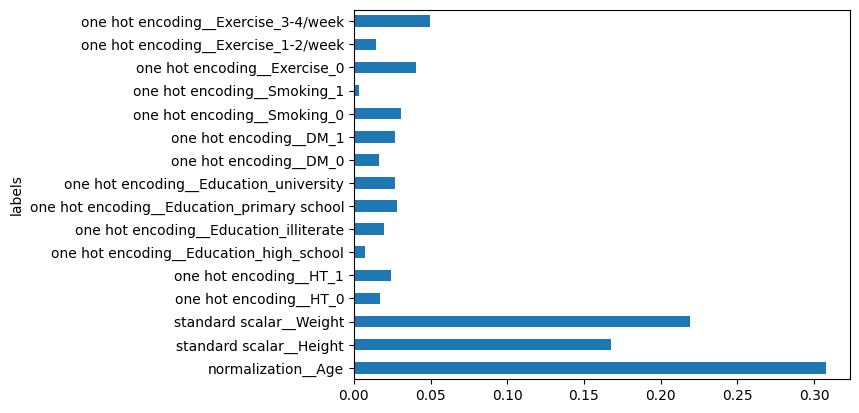

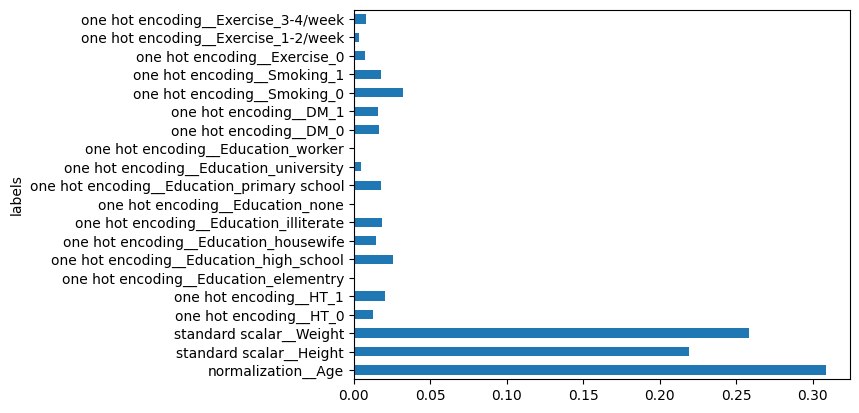

In [524]:
for index in range(0,len(experiments)):
    feature_random_forest(grid_male_list[index])
    feature_random_forest(grid_female_list[index])

In [525]:
print("Results Results for female")
getDataFrame("h_model_1_forest_female")

Results Results for female


,Best Parameters,Training Score,Testing Score,Accuracy,Precision,Recall
0,{},1.00,0.81,0.81,0.43,0.15
1,"{'RandomForest__max_depth': None, 'RandomForest__max_features': 18, 'RandomForest__max_samples': 15, 'RandomForest__n_estimators': 100}",0.84,0.84,0.83,1.00,0.07


In [526]:
print("Historical Results for male")
getDataFrame("h_model_1_forest_male")

Historical Results for male


,Best Parameters,Training Score,Testing Score,Accuracy,Precision,Recall
0,{},1.00,0.72,0.83,0.50,0.38
1,"{'RandomForest__max_depth': 10, 'RandomForest__max_features': 18, 'RandomForest__max_samples': 15, 'RandomForest__n_estimators': 100}",0.73,0.73,0.84,0.56,0.31


In [527]:
# Some Note on Graident Boosting
# Solve the problem of making a weak learner better
# Objective : Lets the weak learner develop and new develop new weaker learner to handle the reminaing diffucult observations.
# Gradient Boosing 
#   1. Create or find a loss function ( There are standard ones to use )
#   2. A weak learner to make predictions ( Algorithm uses decisions trees)
#         Hint for optimization maximum number of layers, nodes, splits, weak node -- Goal to keep the learners weak
#   3. An additive model to add weak learners to minimize the loss function
#         Trees are added one at a time and gradient descent is used to minimize the loss function when adding trees.
#         
#
# Since this is a classification problem logrithmic loss has been selected.


In [528]:
from sklearn.ensemble import GradientBoostingClassifier

parameters1 = {}
parameters2 = {
    'Gradient__min_samples_split': [2,3],
    'Gradient__min_samples_split': [25, 50, 75],
    'Gradient__max_depth': [5,8],
    'Gradient__max_features': ["sqrt","log2", 15 ]
}

# Make the PipeLine 
pipeline = Pipeline(
    [
        ( "Column Transformers", columnTransformer),
        ( "Gradient", GradientBoostingClassifier())
    ])

grid_males = []
grid_females = []
y_prediction_males = []
y_prediction_females = [] 

experiments = [ parameters1, parameters2 ]
for experiment in experiments: 
    (grid, y_predictions_male) = trainTestScore(pipeline, experiment, 10, (XTrain_male, yTrain_male), (XTest_male, yTest_male))
    (grid2, y_predictions_female) = trainTestScore(pipeline, experiment, 10, (XTrain_female, yTrain_female), (XTest_female, yTest_female))
    grid_males.append(grid)
    grid_females.append(grid2)
    y_prediction_females.append(y_prediction_females)
    y_prediction_males.append(y_prediction_males)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END .............., score=(train=0.916, test=0.786) total time=   0.0s
[CV 2/10] END .............., score=(train=0.936, test=0.821) total time=   0.0s
[CV 3/10] END .............., score=(train=0.936, test=0.679) total time=   0.0s
[CV 4/10] END .............., score=(train=0.916, test=0.643) total time=   0.0s
[CV 5/10] END .............., score=(train=0.928, test=0.786) total time=   0.0s
[CV 6/10] END .............., score=(train=0.932, test=0.750) total time=   0.0s
[CV 7/10] END .............., score=(train=0.928, test=0.750) total time=   0.0s
[CV 8/10] END .............., score=(train=0.944, test=0.821) total time=   0.0s
[CV 9/10] END .............., score=(train=0.948, test=0.750) total time=   0.0s
[CV 10/10] END ............., score=(train=0.944, test=0.593) total time=   0.0s
(94, 8)
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END .............., score=(train=0.922, test=0.797

The Training Score is  1.0
The Test     Score is  0.72
Accuracy     Score is  0.83
Precision    Score is  0.5
Recall       Score is  0.38
best               is  {}


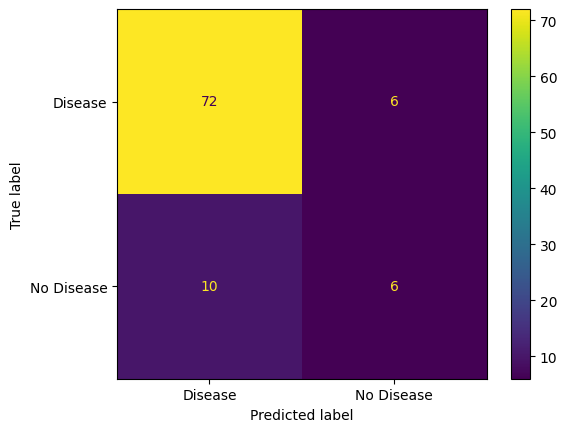

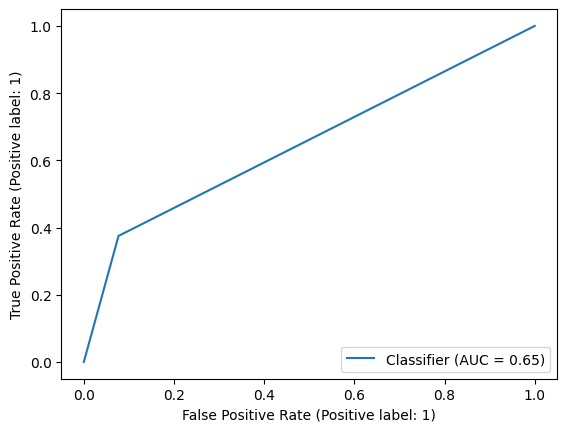

The Training Score is  1.0
The Test     Score is  0.81
Accuracy     Score is  0.81
Precision    Score is  0.43
Recall       Score is  0.15
best               is  {}


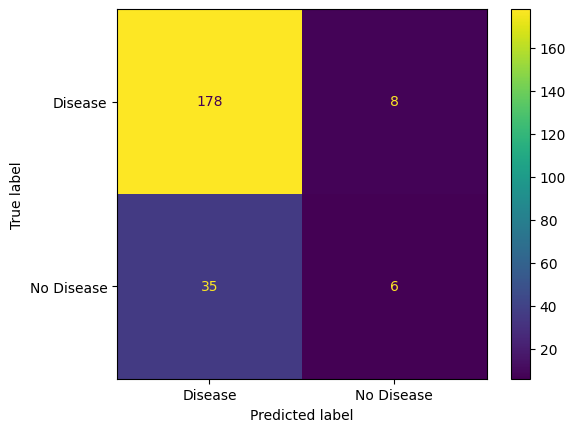

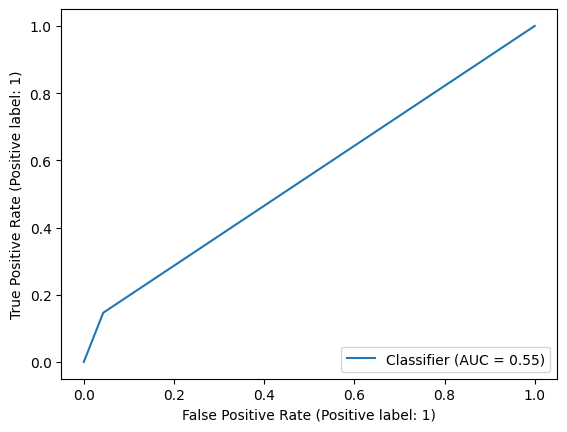

The Training Score is  0.73
The Test     Score is  0.73
Accuracy     Score is  0.84
Precision    Score is  0.56
Recall       Score is  0.31
best               is  {'RandomForest__max_depth': 10, 'RandomForest__max_features': 18, 'RandomForest__max_samples': 15, 'RandomForest__n_estimators': 100}


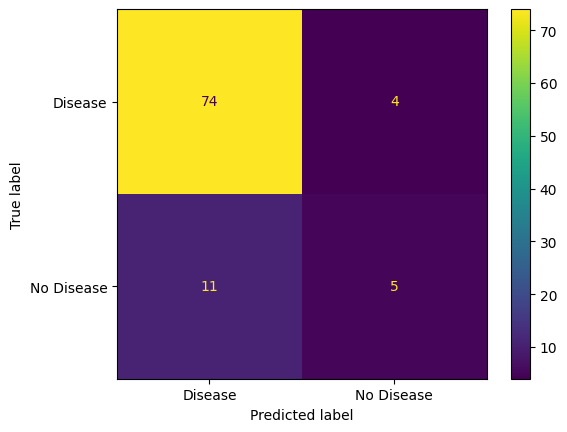

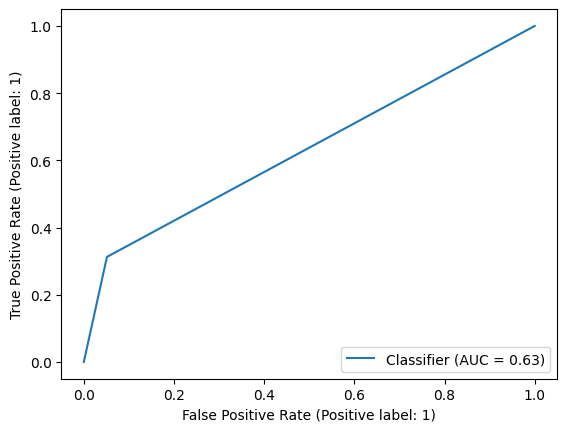

The Training Score is  0.84
The Test     Score is  0.84
Accuracy     Score is  0.83
Precision    Score is  1.0
Recall       Score is  0.07
best               is  {'RandomForest__max_depth': None, 'RandomForest__max_features': 18, 'RandomForest__max_samples': 15, 'RandomForest__n_estimators': 100}


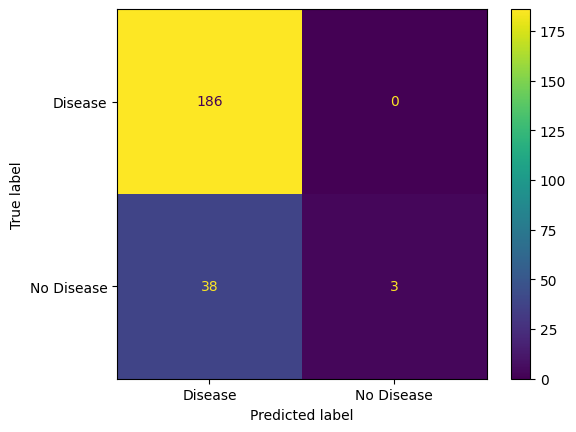

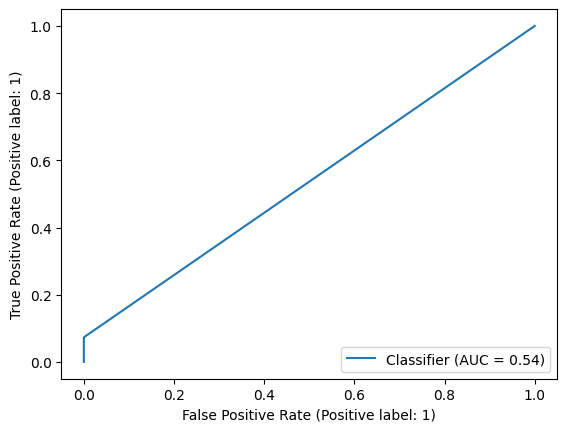

In [529]:
for index in range(0,len(experiments)):
    results(grid_male_list[index],  "RandomForest", XTest_male, yTest_male, prediction_male_list[index], model_1_forest_female, "h_model_1_gradient_male")
    results(grid_female_list[index], "RandomForest", XTest_female, yTest_female, prediction_female_list[index], model_1_forest_male, "h_model_1_gradient_female")

model =  <class 'sklearn.ensemble._forest.RandomForestClassifier'>
model =  <class 'sklearn.ensemble._forest.RandomForestClassifier'>
model =  <class 'sklearn.ensemble._forest.RandomForestClassifier'>
model =  <class 'sklearn.ensemble._forest.RandomForestClassifier'>


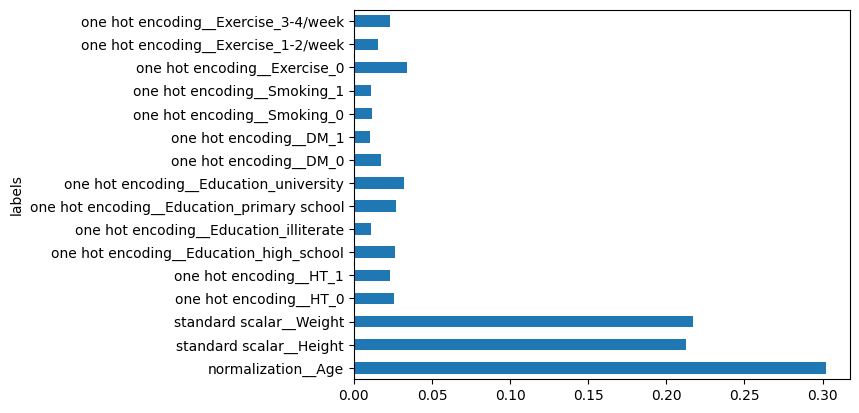

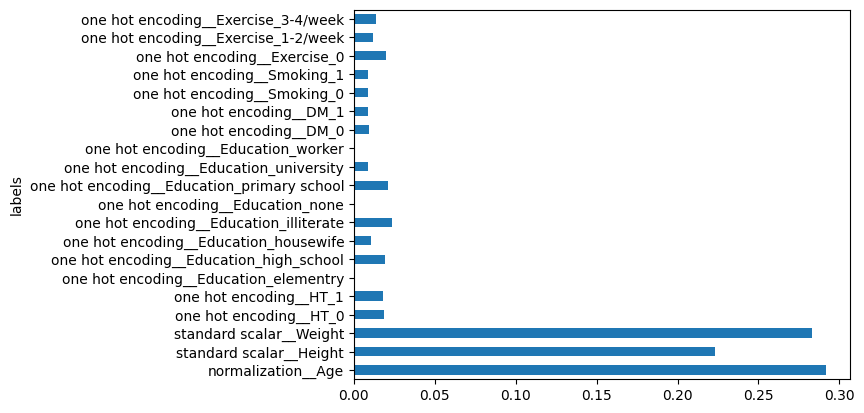

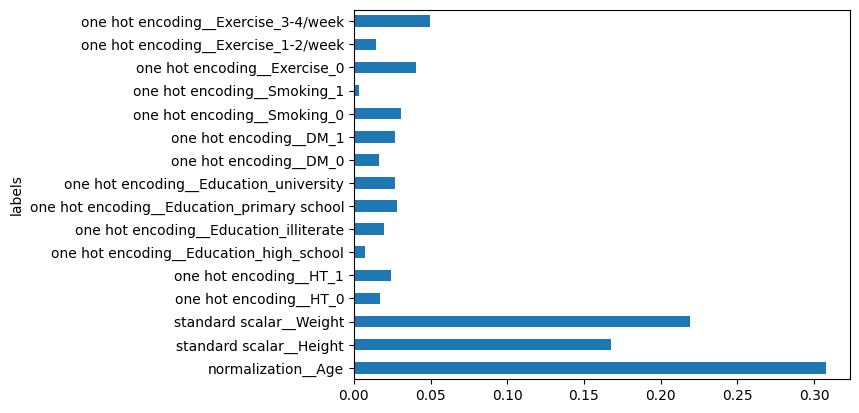

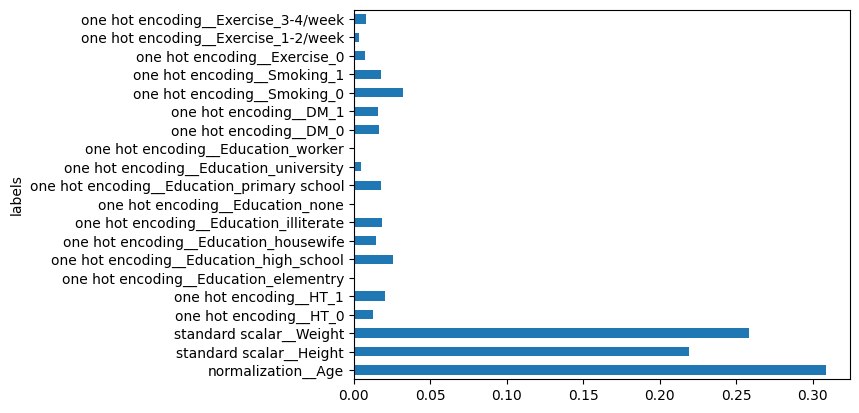

In [530]:
for index in range(0,len(experiments)):
    feature_random_forest(grid_male_list[index])
    feature_random_forest(grid_female_list[index])

In [531]:
print("Historical results for male")
getDataFrame("h_model_1_gradient_male")

Historical results for male


,Best Parameters,Training Score,Testing Score,Accuracy,Precision,Recall
0,{},1.00,0.72,0.83,0.50,0.38
1,"{'RandomForest__max_depth': 10, 'RandomForest__max_features': 18, 'RandomForest__max_samples': 15, 'RandomForest__n_estimators': 100}",0.73,0.73,0.84,0.56,0.31
2,{},1.00,0.72,0.83,0.50,0.38
3,"{'RandomForest__max_depth': 10, 'RandomForest__max_features': 18, 'RandomForest__max_samples': 15, 'RandomForest__n_estimators': 100}",0.73,0.73,0.84,0.56,0.31


In [532]:
print("Historical results for female")
getDataFrame("h_model_1_gradient_female")


Historical results for female


,Best Parameters,Training Score,Testing Score,Accuracy,Precision,Recall
0,{},1.00,0.81,0.81,0.43,0.15
1,"{'RandomForest__max_depth': None, 'RandomForest__max_features': 18, 'RandomForest__max_samples': 15, 'RandomForest__n_estimators': 100}",0.84,0.84,0.83,1.00,0.07
2,{},1.00,0.81,0.81,0.43,0.15
3,"{'RandomForest__max_depth': None, 'RandomForest__max_features': 18, 'RandomForest__max_samples': 15, 'RandomForest__n_estimators': 100}",0.84,0.84,0.83,1.00,0.07
